# **Ocean Proximity**

In this exercise we will try to predict the proximity of the ocean with respect to a set of houses.

**Link:**
- Exercise Kaggle: https://www.kaggle.com/camnugent/california-housing-prices


# **1. Data Analysis**

## Library Import


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping
import tensorflow as tf

## Dataset Import

In [ ]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/DL1_OP/housing.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(20640, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


variables

* **longitude:** Longitude value of the coordinate.
* **latitude:** Latitude value of the coordinate.
* **housing_median_age:** Average age of the dwellings in this area.
* **total_rooms:** Total rooms.
* **total_bedrooms:** Total beds.
* **population:** Population in this zone. It is important to note that it is also a total value.
* **households:** Homes in this area. It is important to note that it is also a total value.
* **median_income:** Median salary of people in this area.
* **median_house_value:** Median house value in this area.
* **ocean_proximity:** The result! It means the proximity of the ocean with respect to the houses in this area. If you look closely, this field contains string values (labels) to determine proximity.

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's visualize the content to get an idea of the distribution of dwellings by population and price.

* It is the area of California, and to the southwest where the circles end, the ocean begins.
* The price is indicated in red for the most expensive homes.
* The homes closest to the ocean are therefore on the California coast.


<Figure size 720x504 with 0 Axes>

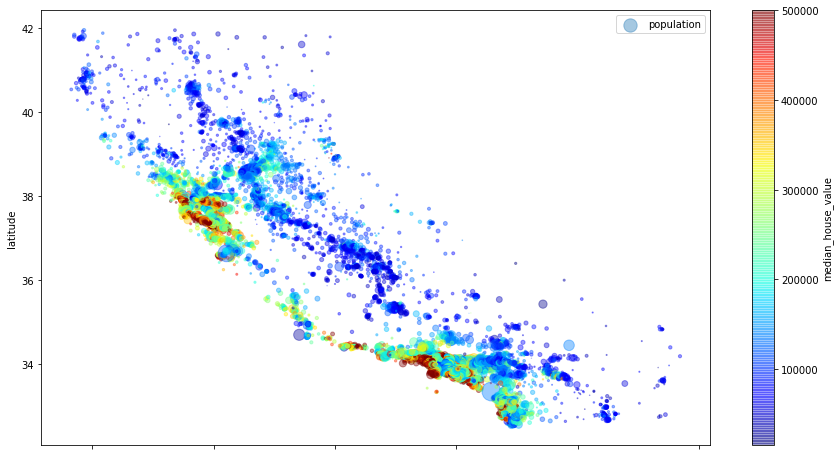

In [ ]:
plt.figure(figsize=(10,7))#prepara el plot
plotter=df.copy()# copia el dataframe
plotter.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=plotter['population']/100,label='population',figsize=(15,8),
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True) 


# **2. Data Pocessing**
Clean and normalize dataset information

![texto alternativo](https://i.imgur.com/8u4xTI7.png)




Null data is not recommended. We must give them a value (the average value or close values) or eliminate them (if there are not many).

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Correlation Matrix

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


'total rooms', 'total rooms', 'population', are total variables of a zone (see values in the table), for which we must solve this problem, normalize them by house and not by zone

In [ ]:
df['rooms_per_household']= df['total_rooms']/df['households']
df['bedrooms_per_household']=df['total_bedrooms']/df['households']
df['populatio_per_household']=df['population']/df['households']

In [ ]:
df.drop(['total_rooms','total_bedrooms','population','households'],axis=1,inplace=True)

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='PiYG')
#color_map:https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,populatio_per_household
longitude,1.000000,-0.924616,-0.109357,-0.015550,-0.045398,-0.027307,0.013402,0.002304
latitude,-0.924616,1.000000,0.011899,-0.079626,-0.144638,0.106423,0.070025,0.002522
housing_median_age,-0.109357,0.011899,1.000000,-0.118278,0.106432,-0.153031,-0.077918,0.013258
median_income,-0.015550,-0.079626,-0.118278,1.000000,0.688355,0.325307,-0.062299,0.018894
median_house_value,-0.045398,-0.144638,0.106432,0.688355,1.000000,0.151344,-0.046739,-0.023639
rooms_per_household,-0.027307,0.106423,-0.153031,0.325307,0.151344,1.000000,0.848616,-0.004873
bedrooms_per_household,0.013402,0.070025,-0.077918,-0.062299,-0.046739,0.848616,1.000000,-0.006179
populatio_per_household,0.002304,0.002522,0.013258,0.018894,-0.023639,-0.004873,-0.006179,1.000000


In [ ]:
ocean_proximity=df.ocean_proximity.astype('category')
ocean_proximity.unique()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [ ]:
(df['ocean_proximity']=='ISLAND').sum()

5

There are no houses on islands

In [ ]:
df=df[df['ocean_proximity']!='ISLAND']

##Data preparation


- To normalize, the already created StandardScaler object from the sklearn.preprocessing library is used:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- On the other hand, it is necessary to create an array of dimension nx1, since it is adequate to work with neural networks.

![texto alternativo](https://i.imgur.com/o7YvGRe.png)

In [ ]:
df['longitude']

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20428, dtype: float64

In [ ]:
df['longitude'].values

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

We will apply reshape(-1,1), where the -1 does not indicate a specific dimension, but rather the array will have N rows by one column. This is the dimension that the network expects in its input data.

We use StandardScaler to Normally scale a variable

In [ ]:
scaler=preprocessing.StandardScaler()
df['longitude']= scaler.fit_transform(df['longitude'].values.reshape(-1,1))
df['latitude']= scaler.fit_transform(df['latitude'].values.reshape(-1,1))
df['housing_median_age']= scaler.fit_transform(df['housing_median_age'].values.reshape(-1,1))
df['median_income']= scaler.fit_transform(df['median_income'].values.reshape(-1,1))
df['median_house_value']= scaler.fit_transform(df['median_house_value'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,populatio_per_household
0,-1.327063,1.051474,0.982560,2.344844,2.129617,NEAR BAY,6.984127,1.023810,2.555556
1,-1.322072,1.042112,-0.606022,2.332314,1.314260,NEAR BAY,6.238137,0.971880,2.109842
2,-1.332054,1.037431,1.856279,1.782662,1.258805,NEAR BAY,8.288136,1.073446,2.802260
3,-1.337044,1.037431,1.856279,0.932756,1.165225,NEAR BAY,5.817352,1.073059,2.547945
4,-1.337044,1.037431,1.856279,-0.013287,1.173024,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...
20635,-0.758111,1.800446,-0.288306,-1.216782,-1.115349,INLAND,5.045455,1.133333,2.560606
20636,-0.818000,1.805127,-0.844309,-0.692138,-1.124014,INLAND,6.114035,1.315789,3.122807
20637,-0.822991,1.777041,-0.923738,-1.143232,-0.992309,INLAND,5.205543,1.120092,2.325635
20638,-0.872899,1.777041,-0.844309,-1.055203,-1.058162,INLAND,5.329513,1.171920,2.123209


In [ ]:
df.describe(include='all')

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,populatio_per_household
count,2.042800e+04,2.042800e+04,2.042800e+04,2.042800e+04,2.042800e+04,20428,20428.000000,20428.000000,20428.000000
unique,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9034,NaN,NaN,NaN
mean,8.026535e-15,6.663849e-15,3.990727e-15,-2.247674e-16,9.773419e-16,NaN,5.431289,1.096958,3.071701
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,NaN,2.483188,0.476106,10.439541
min,-2.385114e+00,-1.448222e+00,-2.194603e+00,-1.775068e+00,-1.662107e+00,NaN,0.846154,0.333333,0.692308
25%,-1.112458e+00,-7.975518e-01,-8.443092e-01,-6.886636e-01,-7.568434e-01,NaN,4.441394,1.006005,2.429049
50%,5.345088e-01,-6.430762e-01,2.941069e-02,-1.758134e-01,-2.350060e-01,NaN,5.230769,1.048860,2.817653
75%,7.790584e-01,9.765767e-01,6.648433e-01,4.594316e-01,5.015017e-01,NaN,6.052381,1.099574,3.281612


# **3. Modelo de Red Neuronal**

![](https://pathmind.com/images/wiki/perceptron_node.png)

**Ejemplo de Red Neuronal Clasificador con función de activación SoftMax**

![Modelo](https://i.imgur.com/wcOwh5O.png)


- The first thing we have to do is remove the output variable. If you don't do this, the model will be trained with the same variable you want to predict. A new DataFrame is created that we will call X and it will be our input variable.
- We have to make a LeavelEncoder to be able to assign a numeric value to the output variable (ocean proximity), and that until now has character values. A DataFrame Y is created for the output variable.
- Create a set of training and validation data. For this we use train_test_split, with the input data and the output variable. Which serves to divide arrays or matrices into random subsets of train and test.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
X=df.drop(['ocean_proximity'],axis=1)
X

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,populatio_per_household
0,-1.327063,1.051474,0.982560,2.344844,2.129617,6.984127,1.023810,2.555556
1,-1.322072,1.042112,-0.606022,2.332314,1.314260,6.238137,0.971880,2.109842
2,-1.332054,1.037431,1.856279,1.782662,1.258805,8.288136,1.073446,2.802260
3,-1.337044,1.037431,1.856279,0.932756,1.165225,5.817352,1.073059,2.547945
4,-1.337044,1.037431,1.856279,-0.013287,1.173024,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...
20635,-0.758111,1.800446,-0.288306,-1.216782,-1.115349,5.045455,1.133333,2.560606
20636,-0.818000,1.805127,-0.844309,-0.692138,-1.124014,6.114035,1.315789,3.122807
20637,-0.822991,1.777041,-0.923738,-1.143232,-0.992309,5.205543,1.120092,2.325635
20638,-0.872899,1.777041,-0.844309,-1.055203,-1.058162,5.329513,1.171920,2.123209


In [ ]:
# This creates and , with a LabelEncoder to pass the values of the feature we want to find out to integers
encoder=preprocessing.LabelEncoder()
Y=encoder.fit_transform(df.ocean_proximity)

In [ ]:
# This reates the training and validation dataset.
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Proper form is needed for the output variable. So we do a OneHotencoding to convert a class vector (integers) to a binary class array.
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
# This converts y_train and y_test to the format needed to train our model with: np_utils.to_categorical
num_classes=len(np.unique(Y))
Y_train=np_utils.to_categorical(y_train,num_classes)
Y_test=np_utils.to_categorical(y_test,num_classes)
Y_test

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

## Model
- Adam optimizer is used and a loss function that is categorical since it is a categorization problem.
- There are 8 input dimensions and 4 output dimensions that must be respected due to the nature of the data. The activation function of the last layer must be sotmax because it will find the probabilities of the last layer that has four possible outputs.

In [ ]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=2,restore_best_weights=True,patience=10)
model=Sequential()
model.add(Dense(500,input_dim=8,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               4500      
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)              

## Training
- We must train the model by passing the training data X_train and Y_train.
- We also define a validation split, since we are using EarlyStoping. In this way, a validation set is defined that will be used throughout the training and not at the end, as is the case with the Test data. It is to be expected that the accuracy of the train and the validation will grow together as long as we do not have overfitting. On the contrary, these values differ when the network begins to memorize the data.

EarlyStopping will stop the model earlier when it starts to overfit. You may not complete all 150 epochs of training. This is done from the callbacks parameter, every time the model trains an epoch, it will verify if it is convenient to stop learning or not.

In [ ]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=2,restore_best_weights=True,patience=10)
history=model.fit(X_train,Y_train,validation_split=0.25,batch_size=200,epochs=150,callbacks=[es])

Epoch 1/150
62/62 [==============================] - 2s 24ms/step - loss: 0.8640 - accuracy: 0.6640 - val_loss: 0.5795 - val_accuracy: 0.7795
Epoch 2/150
62/62 [==============================] - 1s 20ms/step - loss: 0.5337 - accuracy: 0.7892 - val_loss: 0.4813 - val_accuracy: 0.8209
Epoch 3/150
62/62 [==============================] - 1s 20ms/step - loss: 0.3978 - accuracy: 0.8395 - val_loss: 0.3930 - val_accuracy: 0.8453
Epoch 4/150
62/62 [==============================] - 1s 20ms/step - loss: 0.3349 - accuracy: 0.8635 - val_loss: 0.3336 - val_accuracy: 0.8603
Epoch 5/150
62/62 [==============================] - 1s 20ms/step - loss: 0.3089 - accuracy: 0.8711 - val_loss: 0.4021 - val_accuracy: 0.8314
Epoch 6/150
62/62 [==============================] - 1s 20ms/step - loss: 0.2820 - accuracy: 0.8844 - val_loss: 0.3313 - val_accuracy: 0.8700
Epoch 7/150
62/62 [==============================] - 1s 20ms/step - loss: 0.2883 - accuracy: 0.8802 - val_loss: 0.3075 - val_accuracy: 0.8634
Epoch 

In [ ]:
results=model.evaluate(X_test,Y_test)
results

128/128 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9435


[0.16281427443027496, 0.9434654712677002]

In [ ]:
# FUNCIÓN AUXILIAR, EJECUTAR, NO MODIFICAR.
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


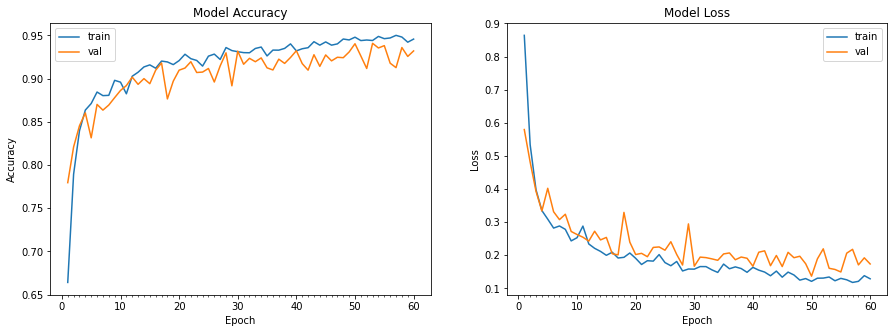

In [ ]:
plot_model_history(history)